# GPcounts on bulk dataset

Nuha BinTayyash, 2020

This notebook shows how to run [DESeq2](https://bioconductor.org/packages/release/bioc/html/DESeq2.html) R package to normalize [fission yeast](https://bioconductor.org/packages/release/data/experiment/html/fission.html) gene expression data. Then, compare GPcounts with negative binomial likelihood and Gaussian likelihood to find differentially expressed genes in one sample test and two-sample tests.

In [1]:
import numpy as np
import pandas as pd
import gpflow

In [2]:
Y = pd.read_csv('exons_counts.csv',index_col=[0])
X = pd.read_csv('time_points.csv',index_col=[0])
#X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) 
X

,time
E11_1_F,95.0
E12_1_F,105.0
E13A_1_F,115.0
E13B_1_F,125.0
E14A_1_F,145.0
E14B_1_F,160.0
E14C_1_F,175.0
E14D_1_F,190.0
E14E_1_F,205.0
ECF_1_F,220.0


Fit some fission gene normalized data using GPcounts -- Two samples test

In [3]:
from matplotlib import pyplot as plt
import statsmodels.api as sm

def plot():
    plt.tick_params(labelsize='large', width=2)     
    #plt.ylabel('Gene Expression', fontsize=16)
    #plt.xlabel('Times', fontsize=16)
    c = 'royalblue'
    
    if model_index == 3:
        c = 'green'
    
    plt.plot(xtest, mean,color= c, lw=2) 
    
    if likelihood == 'Gaussian':
        plt.fill_between(xtest[:,0],
                            mean[:,0] - 1*np.sqrt(var[:,0]),
                            mean[:,0] + 1*np.sqrt(var[:,0]),color=c,alpha=0.2) # one standard deviation
        plt.fill_between(xtest[:,0],
                            mean[:,0] - 2*np.sqrt(var[:,0]),
                            mean[:,0] + 2*np.sqrt(var[:,0]),color=c, alpha=0.1)# two standard deviation
    else:
       
        lowess = sm.nonparametric.lowess    
        # one standard deviation 68%
        percentile_16 = lowess(np.percentile(var, 16, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_16 = [(i > 0) * i for i in percentile_16]
        percentile_84 = lowess(np.percentile(var, 84, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_84 = [(i > 0) * i for i in percentile_84]
        plt.fill_between(xtest[:,0],percentile_16,percentile_84,color=c,alpha=0.2)
        
        # two standard deviation 95%
        percentile_5 = lowess(np.percentile(var, 5, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_5 = [(i > 0) * i for i in percentile_5]
        percentile_95 = lowess(np.percentile(var,95, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_95 = [(i > 0) * i for i in percentile_95]
        plt.fill_between(xtest[:,0],percentile_5,percentile_95,color=c,alpha=0.1)
    
    if test == 'Two_samples_test' and model_index == 1:
        plt.scatter(model.data[0][0:int(model.data[0].shape[0]/2)],model.data[1][0:int(model.data[0].shape[0]/2)], s=30, marker='o', color= 'royalblue',alpha=1.) #data    
        plt.scatter(model.data[0][int(model.data[0].shape[0]/2)::],model.data[1][int(model.data[0].shape[0]/2)::], s=30, marker='o', color= 'green',alpha=1.) #data

    else: 
        plt.scatter(model.data[0],model.data[1],s=30,marker = 'o',color=c,alpha=1.)
    
    
    if not(test == 'Two_samples_test' and model_index == 2):
        plt.show()
    

In [4]:
genes_name = [
 'FBgn0003638',
 'FBgn0004237',
 'FBgn0010226',
 'FBgn0010504',
 'FBgn0011888',
 'FBgn0011944',
 'FBgn0011994',
 'FBgn0013679',
 'FBgn0013681',
 'FBgn0013684',
 'FBgn0015791',
 'FBgn0022710']

In [5]:
from GPcounts.GPcounts_Module import Fit_GPcounts
likelihood = 'Negative_binomial' 
gp_counts = Fit_GPcounts(X,Y.loc[genes_name])
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/12 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.024567745503791025, 'km': 35.0}


  8%|▊         | 1/12 [00:08<01:33,  8.52s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.0758776276078372, 'km': 35.0}


 17%|█▋        | 2/12 [00:12<01:11,  7.15s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
0
Fit Cholesky decomposition was not successful.
{'ls': 103.03107628041401, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
1
Fit Cholesky decomposition was not successful.
{'ls': 103.35551282662827, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.03306389843123594, 'km': 35.0}


 25%|██▌       | 3/12 [00:21<01:10,  7.78s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.031929298883950775, 'km': 35.0}


 33%|███▎      | 4/12 [00:24<00:50,  6.33s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.07479878746822424, 'km': 35.0}


 42%|████▏     | 5/12 [00:27<00:37,  5.31s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 1.1967160595099975e-10, 'km': 35.0}


 50%|█████     | 6/12 [00:29<00:25,  4.26s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.728750807064167e-13, 'km': 35.0}


 58%|█████▊    | 7/12 [00:31<00:17,  3.51s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.27625597421304227, 'km': 35.0}


 67%|██████▋   | 8/12 [00:33<00:12,  3.25s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.3643307395804254, 'km': 35.0}


 75%|███████▌  | 9/12 [00:36<00:09,  3.10s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.24141571331643027, 'km': 35.0}


 83%|████████▎ | 10/12 [00:39<00:05,  2.96s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.03421512498971599, 'km': 35.0}


 92%|█████████▏| 11/12 [00:41<00:02,  2.87s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.13128229440863093, 'km': 35.0}


100%|██████████| 12/12 [00:44<00:00,  3.68s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0003638,-116.185470,-116.743664,0.558194
FBgn0004237,-151.624744,-152.010109,0.385365
FBgn0010226,-159.483904,-157.265873,-2.218031
FBgn0010504,-94.150940,-95.064073,0.913133
FBgn0011888,-87.025257,-89.657393,2.632136
FBgn0011944,-27.656963,-27.972112,0.315149
FBgn0011994,-20.218841,-21.080930,0.862089
FBgn0013679,-164.765995,-163.765514,-1.000481
FBgn0013681,-94.935695,-99.036731,4.101036
FBgn0013684,-167.472542,-166.607270,-0.865272


  0%|          | 0/12 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


  8%|▊         | 1/12 [00:00<00:10,  1.01it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 17%|█▋        | 2/12 [00:01<00:09,  1.04it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 25%|██▌       | 3/12 [00:02<00:08,  1.06it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 4/12 [00:03<00:07,  1.05it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 42%|████▏     | 5/12 [00:04<00:06,  1.04it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 50%|█████     | 6/12 [00:05<00:05,  1.09it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 58%|█████▊    | 7/12 [00:06<00:04,  1.12it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 8/12 [00:07<00:03,  1.11it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 75%|███████▌  | 9/12 [00:08<00:02,  1.09it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 83%|████████▎ | 10/12 [00:09<00:01,  1.10it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 92%|█████████▏| 11/12 [00:10<00:00,  1.08it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 12/12 [00:11<00:00,  1.08it/s]


FBgn0003638


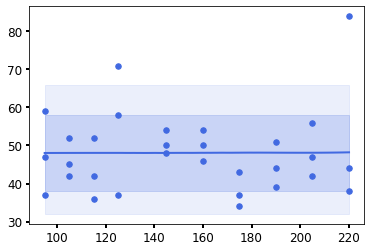

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,14.739142647455743
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,78745.35318655273
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.024567745503791025
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00806456e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.01665508e-02, 0.00000000e+00, 0.00000000e+00..."


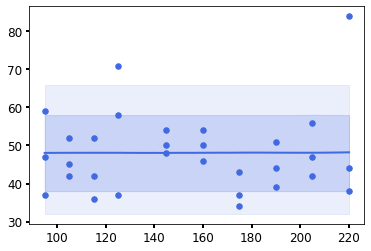

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49557086191585
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.024567745503791025
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.71588898e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.73604843e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0004237


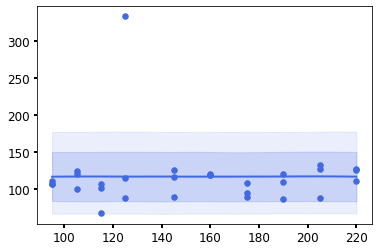

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,23.269863306061513
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,44822.25205580156
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.0758776276078372
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.85693794e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.10751886e-02, 0.00000000e+00, 0.00000000e+00..."


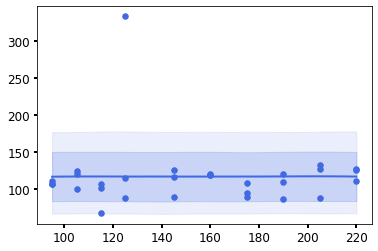

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49524980410867
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.0758776276078372
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.56520241e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-5.09531056e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0010226


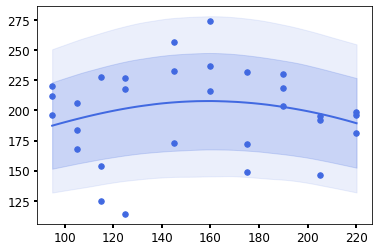

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,11.731706617293396
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,307.5903157676487
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.03306389843123594
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.52627456e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.07575850e-02, 0.00000000e+00, 0.00000000e+00..."


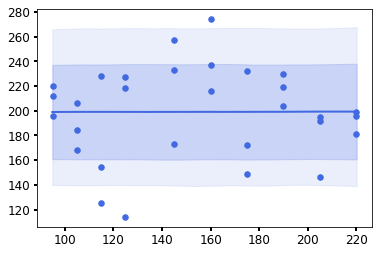

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.4940529688219
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.03306389843123594
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[5.08017396e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.42138659e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0010504


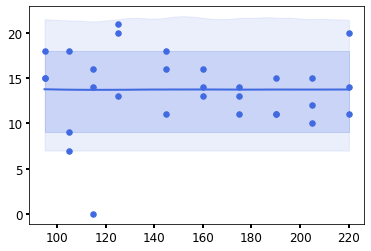

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,6.865698764074827
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,118078.77330492114
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.031929298883950775
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.98146807e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.25883627e-02, 0.00000000e+00, 0.00000000e+00..."


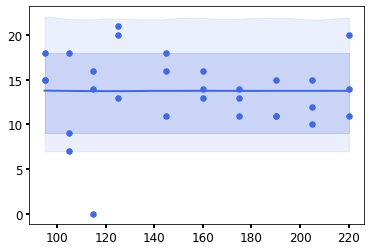

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49442249762646
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.031929298883950775
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[2.51211313e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-5.67931417e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0011888


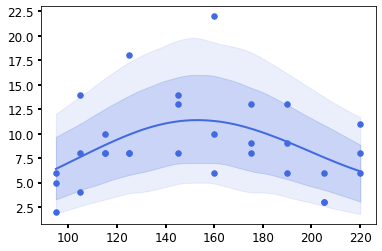

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.5383683078961643
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,99.11630774557587
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.07479878746822424
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.15421318e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.13051965e-01, 0.00000000e+00, 0.00000000e+00..."


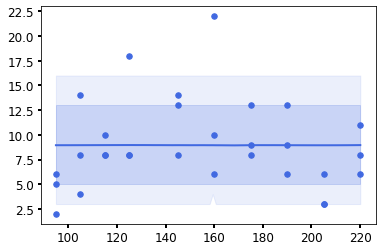

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49491172636547
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.07479878746822424
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[2.09800296e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-7.58848077e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0011944


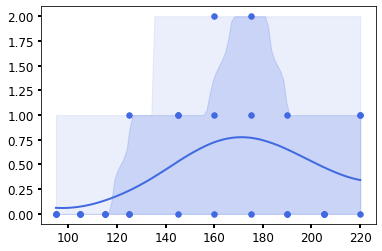

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,107.04472638112844
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,104.59891734498221
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.1967160595099975e-10
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-3.62387751e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.16851390e-01, 0.00000000e+00, 0.00000000e+00..."


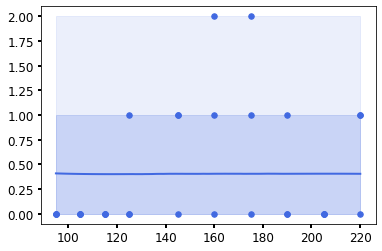

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.4969582558828
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,1.1967160595099975e-10
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.18917928e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.76934400e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0011994


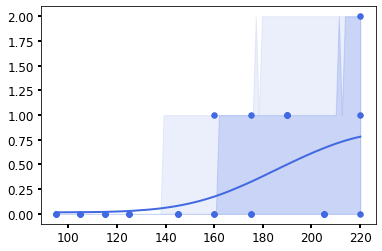

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,104.73275263738395
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,108.64742242913584
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.728750807064167e-13
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-6.10728606e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.02287266e-01, 0.00000000e+00, 0.00000000e+00..."


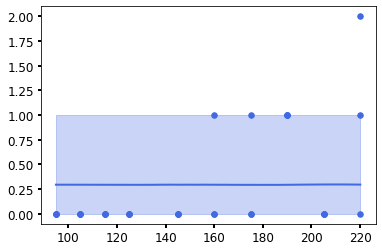

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.7674268731345588
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,5.728750807064167e-13
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.69085754e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.46724263e-01, 0.00000000e+00, 0.00000000e+00..."


FBgn0013679


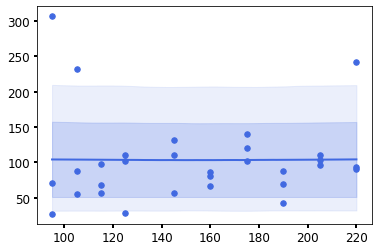

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,87.61698282712076
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1546.6054752273847
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.27625597421304227
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.94172705e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.67121265e-02, 0.00000000e+00, 0.00000000e+00..."


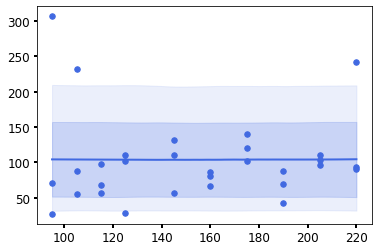

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49565633595766
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.27625597421304227
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.44908402e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[9.37327400e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0013681


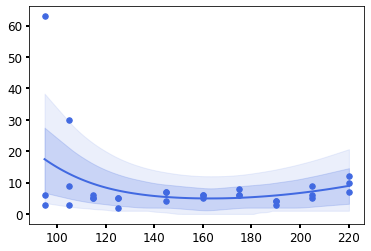

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.726625801350393
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,91.0587038576165
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.3643307395804254
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.55915646e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[8.36329423e-02, 0.00000000e+00, 0.00000000e+00..."


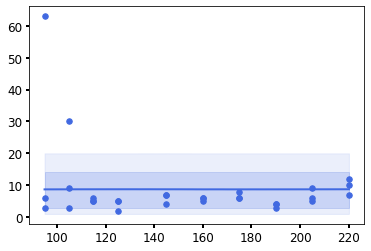

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49505899180062
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.3643307395804254
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[2.06573098e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.21731138e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0013684


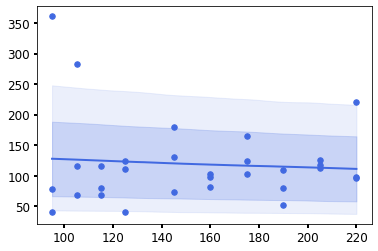

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,94.805922600819
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1806.798502445389
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.24141571331643027
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.96345560e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.50091233e-02, 0.00000000e+00, 0.00000000e+00..."


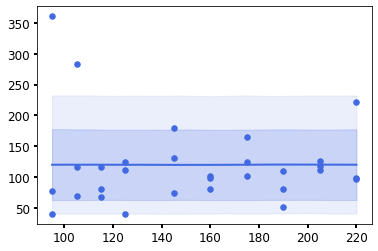

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49548952778981
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.24141571331643027
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.58754087e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[8.76221556e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0015791


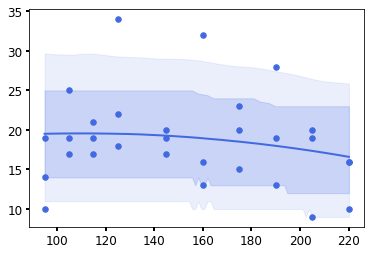

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.02207977480795
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,373.19293721974446
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.03421512498971599
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.32138379e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.22610402e-02, 0.00000000e+00, 0.00000000e+00..."


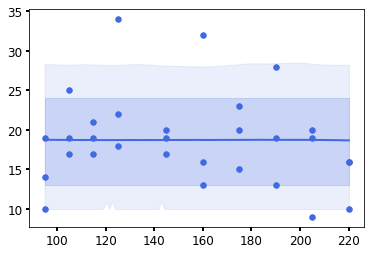

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49519518004261
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.03421512498971599
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[2.80943632e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-5.19512567e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0022710


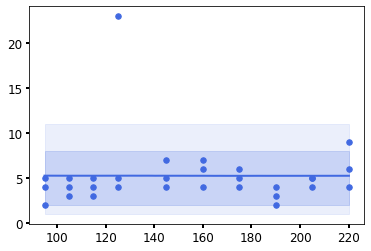

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.7323476903236874
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,103075.14308481435
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.13128229440863093
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.96721834e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[6.27126935e-02, 0.00000000e+00, 0.00000000e+00..."


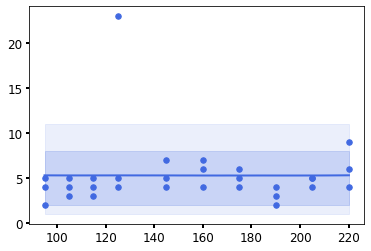

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49490467070156
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.13128229440863093
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.58781142e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-9.96389670e-03, 0.00000000e+00, 0.00000000e+00..."


In [6]:
indexes = log_likelihood_ratio.index.values # list of genes to be plotted 
test = 'One_sample_test' # name of the test
xtest = np.linspace(np.min(X.values)-.1,np.max(X.values)+.1,100)[:,None] # points to make prediction
likelihood = 'Negative_binomial'
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for mean,var,model in zip(params['means'][i],params['vars'][i],params['models'][i]):
        plot() 
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')

In [7]:
likelihood = 'Gaussian'
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/12 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


  8%|▊         | 1/12 [00:00<00:07,  1.40it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 17%|█▋        | 2/12 [00:01<00:06,  1.49it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 25%|██▌       | 3/12 [00:01<00:05,  1.66it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
0
Fit Cholesky decomposition was not successful.
{'ls': 103.03107628041401, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}


 33%|███▎      | 4/12 [00:02<00:04,  1.61it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 42%|████▏     | 5/12 [00:02<00:03,  1.77it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 50%|█████     | 6/12 [00:03<00:03,  1.93it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
0
Fit Cholesky decomposition was not successful.
{'ls': 103.03107628041401, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}


 58%|█████▊    | 7/12 [00:03<00:02,  1.80it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 8/12 [00:04<00:02,  1.92it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 75%|███████▌  | 9/12 [00:04<00:01,  2.02it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
0
Fit Cholesky decomposition was not successful.
{'ls': 103.03107628041401, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}


 83%|████████▎ | 10/12 [00:05<00:01,  1.83it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 92%|█████████▏| 11/12 [00:05<00:00,  1.96it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 12/12 [00:06<00:00,  1.91it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0003638,1.230064,1.230142,-7.789704e-05
FBgn0004237,-6.213935,-6.213929,-5.600026e-06
FBgn0010226,0.545517,0.545552,-3.549371e-05
FBgn0010504,-27.521343,-27.521256,-8.752506e-05
FBgn0011888,-22.492266,-22.401008,-9.125780e-02
FBgn0011944,-19.056959,-15.100712,-3.956247e+00
FBgn0011994,-12.677149,-10.422715,-2.254434e+00
FBgn0013679,-27.278390,-27.276792,-1.597598e-03
FBgn0013681,-29.691898,-29.691898,-8.822403e-07
FBgn0013684,-24.708263,-24.708022,-2.415063e-04


  0%|          | 0/12 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}

  8%|▊         | 1/12 [00:00<00:01,  9.10it/s]


{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 25%|██▌       | 3/12 [00:00<00:00, 10.25it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 42%|████▏     | 5/12 [00:00<00:00, 11.11it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 58%|█████▊    | 7/12 [00:00<00:00, 10.55it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 8/12 [00:00<00:00, 10.15it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 75%|███████▌  | 9/12 [00:00<00:00,  9.28it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 92%|█████████▏| 11/12 [00:01<00:00,  9.36it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 12/12 [00:01<00:00, 10.40it/s]

FBgn0003638


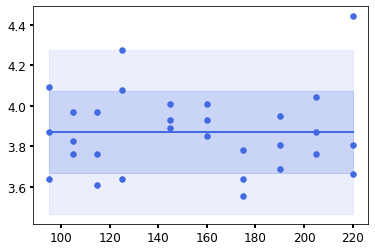

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,14.9817
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,350901
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0395098


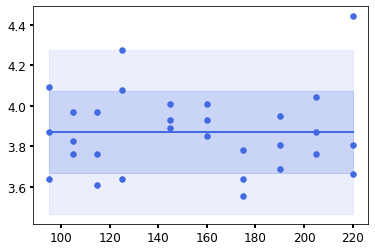

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,14.9833
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.03951


FBgn0004237


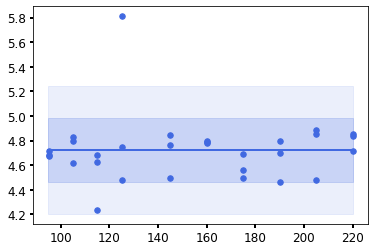

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,22.3076
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.24602e+06
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0651189


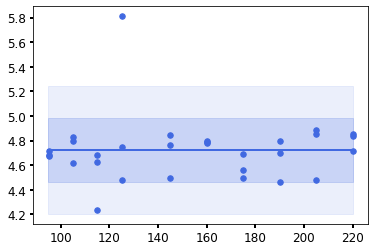

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,22.3077
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0651188


FBgn0010226


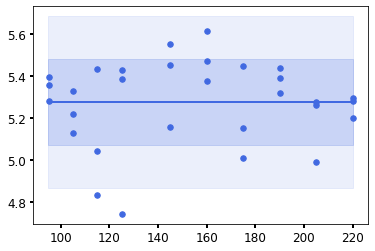

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,27.8502
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,674834
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0405442


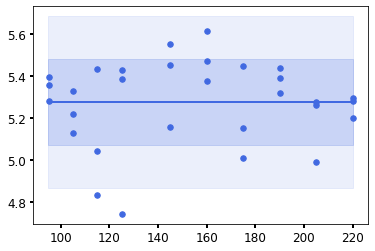

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,27.852
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0405441


FBgn0010504


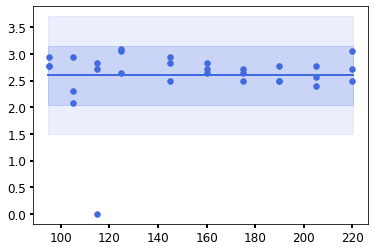

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.77078
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,69706.5
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.294935


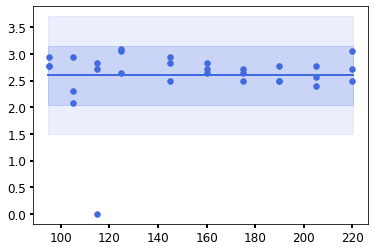

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.77134
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.294934


FBgn0011888


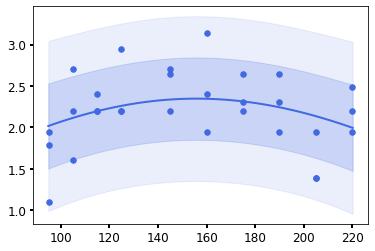

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,5.31623
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,171.979
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.234736


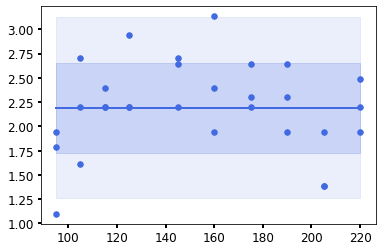

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,4.81526
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.209639


FBgn0011944


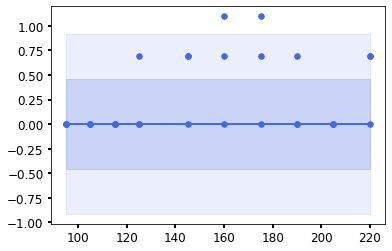

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,4.16381e-128
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,722.53
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.208584


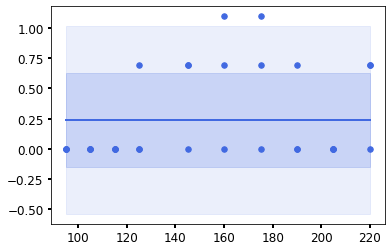

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.0617095
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.146875


FBgn0011994


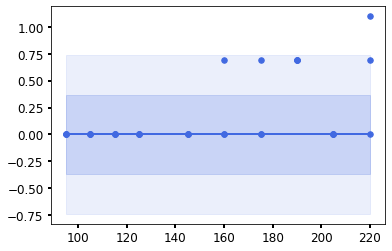

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,7.94217e-72
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,928.144
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.136322


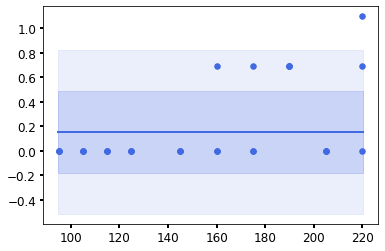

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.0270708
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.109251


FBgn0013679


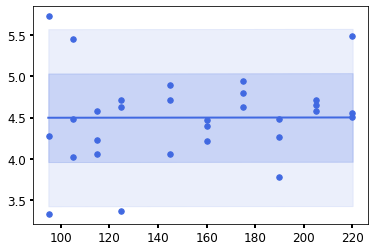

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,20.2312
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,16371.1
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.279206


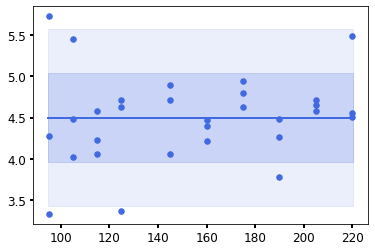

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,20.264
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.279256


FBgn0013681


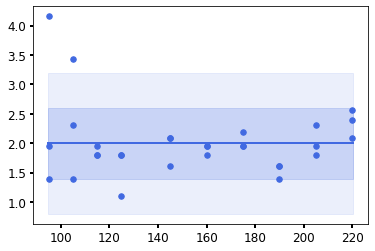

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.99559
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,533796
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.348832


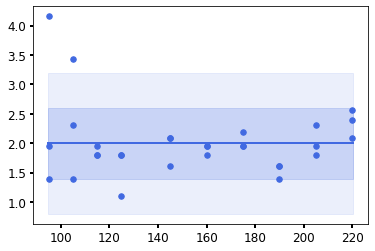

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.9956
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.348832


FBgn0013684


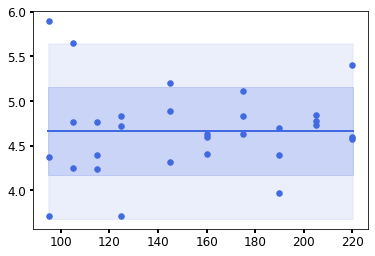

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.7282
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,92019.5
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.23336


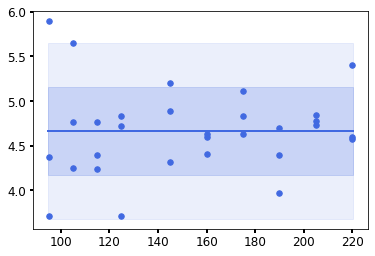

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.7339
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.233355


FBgn0015791


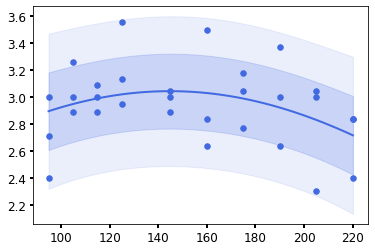

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,4.30587
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,198.378
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0729409


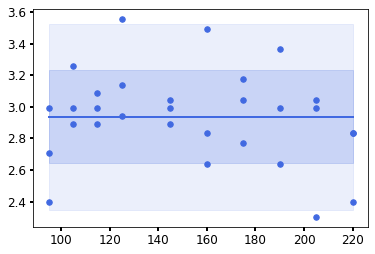

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,8.63338
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0841317


FBgn0022710


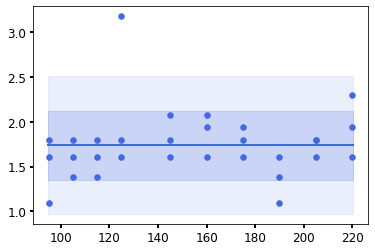

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.03028
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,121985
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.14248


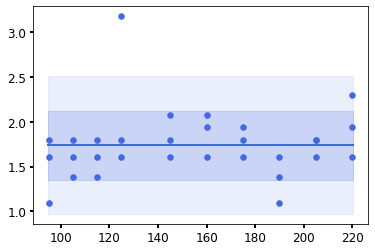

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.03007
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.142482


In [8]:
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for model,mean,var in zip(params['models'][i],params['means'][i],params['vars'][i]):
        plot()
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')

In [9]:
genes_name = [
 'FBgn0000083',
 'FBgn0000108',
 'FBgn0000109',
 'FBgn0000115',
 'FBgn0000221',
 'FBgn0000289',
 'FBgn0000318',
 'FBgn0000464',
 'FBgn0000618',
 'FBgn0001099',
 'FBgn0001202',
 'FBgn0001276',
 'FBgn0001977',
 'FBgn0001995',
 'FBgn0003189']
from GPcounts.GPcounts_Module import Fit_GPcounts
likelihood = 'Negative_binomial' 
gp_counts = Fit_GPcounts(X,Y.loc[genes_name])
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 7.67208518934025e-12, 'km': 35.0}


  7%|▋         | 1/15 [00:03<00:55,  3.96s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 1.6175771831796312e-10, 'km': 35.0}


 13%|█▎        | 2/15 [00:05<00:43,  3.32s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 3.039901663679936e-11, 'km': 35.0}


 20%|██        | 3/15 [00:08<00:36,  3.06s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 2.7443909107795043e-06, 'km': 35.0}


 27%|██▋       | 4/15 [00:13<00:40,  3.72s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.011762271065471092, 'km': 35.0}


 33%|███▎      | 5/15 [00:16<00:36,  3.62s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
Optimization fail.
{'ls': 103.03107628041401, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
Optimization fail.
{'ls': 103.35551282662827, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.005304102837719704, 'km': 35.0}


 40%|████      | 6/15 [00:32<01:04,  7.12s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 1.5254353334883712e-10, 'km': 35.0}


 47%|████▋     | 7/15 [00:35<00:48,  6.04s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 4.508615702992597e-12, 'km': 35.0}


 53%|█████▎    | 8/15 [00:38<00:35,  5.07s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.160094573839489e-12, 'km': 35.0}


 60%|██████    | 9/15 [00:41<00:25,  4.32s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
Optimization fail.
{'ls': 103.03107628041401, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.121680857187656e-12, 'km': 35.0}


 67%|██████▋   | 10/15 [00:44<00:20,  4.02s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 4.2764840843559066e-05, 'km': 35.0}


 73%|███████▎  | 11/15 [00:49<00:17,  4.27s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 7.180589456110321e-11, 'km': 35.0}


 80%|████████  | 12/15 [00:51<00:11,  3.80s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 9.34229467196931e-09, 'km': 35.0}


 87%|████████▋ | 13/15 [00:57<00:08,  4.28s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 4.380051876655243e-11, 'km': 35.0}


 93%|█████████▎| 14/15 [01:00<00:03,  3.98s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 0.03308361725205966, 'km': 35.0}


100%|██████████| 15/15 [01:03<00:00,  4.24s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0000083,-128.561052,-123.712615,-4.848437
FBgn0000108,-45.282289,-44.812098,-0.470191
FBgn0000109,-93.163836,-84.735673,-8.428163
FBgn0000115,-109.208990,-111.817925,2.608935
FBgn0000221,-106.075659,-103.370718,-2.704940
FBgn0000289,-168.354135,-169.502793,1.148658
FBgn0000318,-130.056553,-124.006085,-6.050468
FBgn0000464,-80.712380,-80.999723,0.287343
FBgn0000618,-93.241169,-88.024261,-5.216908
FBgn0001099,-64.116831,-61.278458,-2.838374


  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


  7%|▋         | 1/15 [00:00<00:13,  1.00it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 13%|█▎        | 2/15 [00:01<00:12,  1.03it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 20%|██        | 3/15 [00:02<00:11,  1.03it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 27%|██▋       | 4/15 [00:03<00:10,  1.04it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 5/15 [00:04<00:09,  1.04it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 40%|████      | 6/15 [00:05<00:08,  1.06it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 47%|████▋     | 7/15 [00:06<00:07,  1.07it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:07<00:06,  1.04it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 60%|██████    | 9/15 [00:08<00:05,  1.05it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:09<00:04,  1.06it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 73%|███████▎  | 11/15 [00:10<00:03,  1.07it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 80%|████████  | 12/15 [00:11<00:02,  1.07it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 87%|████████▋ | 13/15 [00:12<00:01,  1.06it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:13<00:00,  1.07it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:14<00:00,  1.06it/s]


FBgn0000083


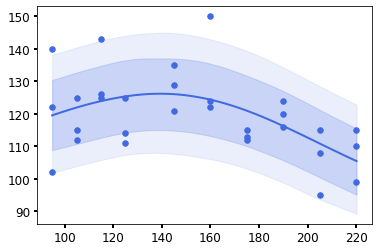

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,96.88923005341535
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,146.2140097345832
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,7.67208518934025e-12
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[0.48568978...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.64490420e-03, 0.00000000e+00, 0.00000000e+00..."


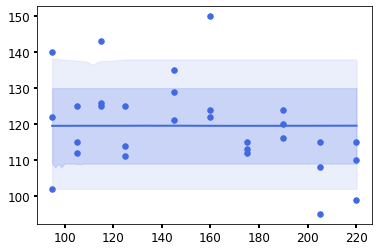

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49621212487492
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,7.67208518934025e-12
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.59152805e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.60388515e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000108


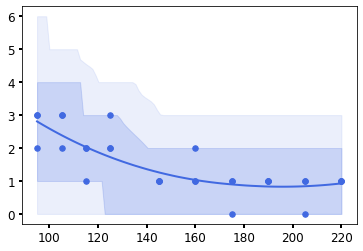

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,107.00748345580246
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,107.5632402387107
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.6175771831796312e-10
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.51719908e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.66607062e-02, 0.00000000e+00, 0.00000000e+00..."


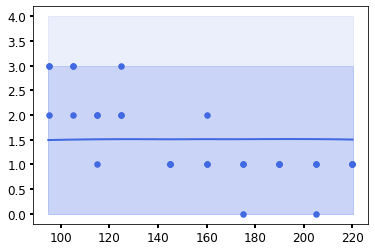

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49778760748997
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,1.6175771831796312e-10
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.78518909e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.43105700e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0000109


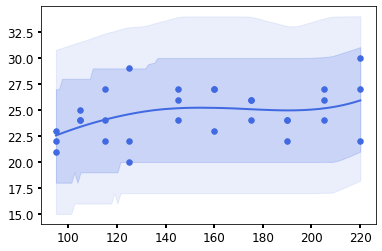

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,105.69119795972277
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,113.0402368724441
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.039901663679936e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.02380660e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.00063579e-02, 0.00000000e+00, 0.00000000e+00..."


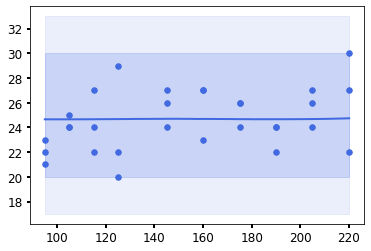

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.5016660430576
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,3.039901663679936e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.07532308e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.53150876e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000115


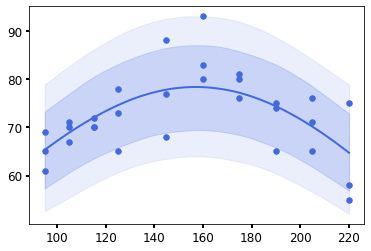

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,28.775892457584693
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,364.1462483807418
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.7443909107795043e-06
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[7.78549414e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[8.90386090e-03, 0.00000000e+00, 0.00000000e+00..."


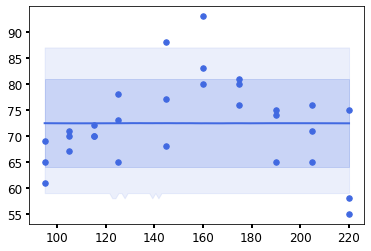

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49894060230851
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,2.7443909107795043e-06
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.11038809e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.06065288e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000221


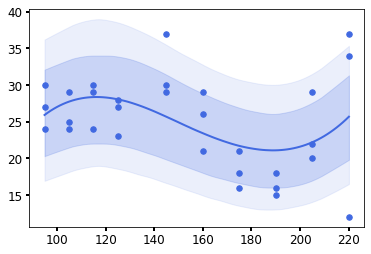

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,86.3309481322843
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,143.83896273255405
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.011762271065471092
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.49862727e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.11433820e-02, 0.00000000e+00, 0.00000000e+00..."


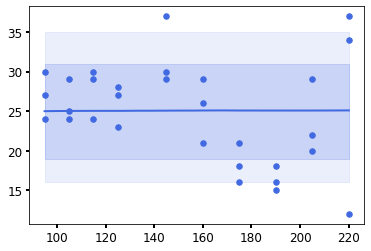

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49493658857814
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.011762271065471092
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.08979028e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-3.98848948e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000289


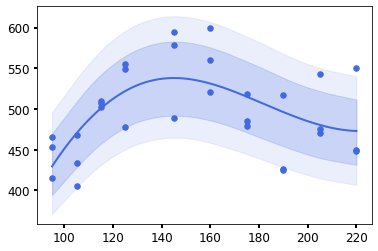

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,68.49824723821433
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,185.1393237952384
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.005304102837719704
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[7.32507173e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.92552049e-03, 0.00000000e+00, 0.00000000e+00..."


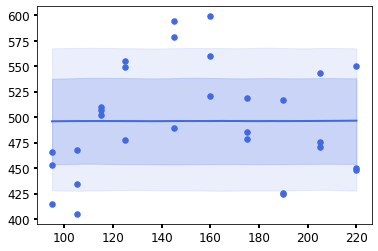

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.4953091340785
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.005304102837719704
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[5.95822174e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.49983487e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000318


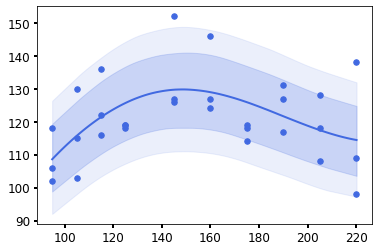

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,103.48312740787209
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,122.75267355800165
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.5254353334883712e-10
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.60601730e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.91640346e-03, 0.00000000e+00, 0.00000000e+00..."


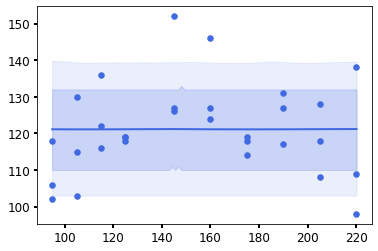

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.50265909242613
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,1.5254353334883712e-10
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[0.46041548...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.59596212e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000464


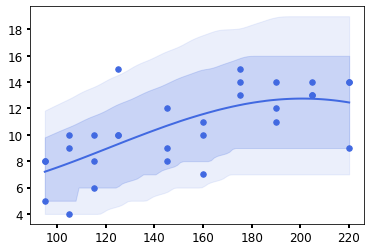

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,81.34608258425023
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,177.2775877387777
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,4.508615702992597e-12
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[2.17010264e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.73125440e-02, 0.00000000e+00, 0.00000000e+00..."


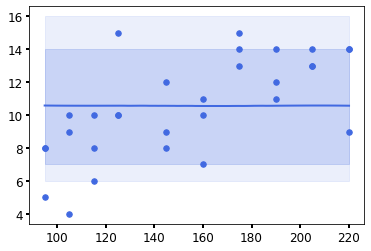

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49821099804677
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,4.508615702992597e-12
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[2.25886864e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.40071608e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000618


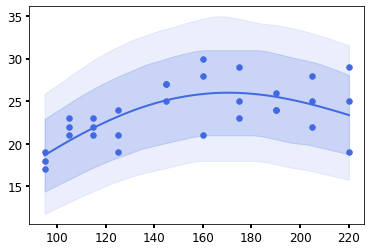

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,103.39373210800693
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,120.11319372547405
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.160094573839489e-12
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[0.28698126...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[9.96833205e-03, 0.00000000e+00, 0.00000000e+00..."


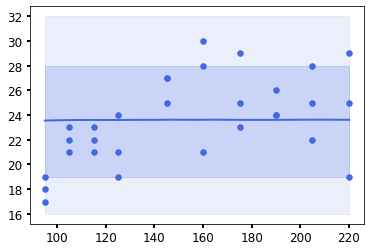

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49906555045294
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,5.160094573839489e-12
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.03283103e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.61061334e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001099


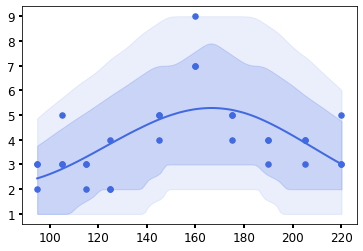

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,109.63957130446997
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,114.90111722570443
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.121680857187656e-12
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[8.06768969e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-2.54463762e-02, 0.00000000e+00, 0.00000000e+00..."


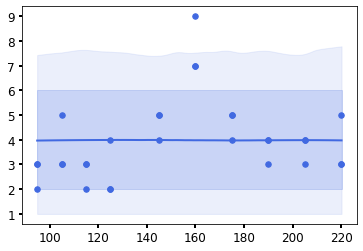

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49804694354401
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,5.121680857187656e-12
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.31872733e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[8.80021584e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001202


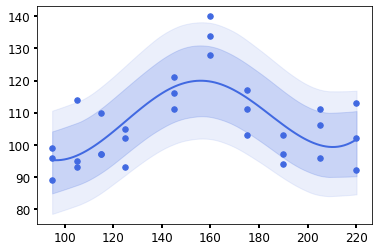

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,107.56798179557585
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,105.57208509219791
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,4.2764840843559066e-05
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[0.43897543...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.11620299e-03, 0.00000000e+00, 0.00000000e+00..."


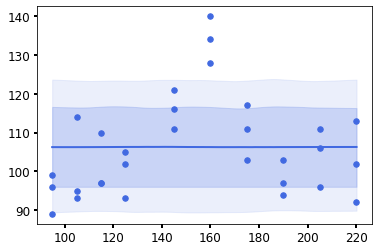

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49837926784899
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,4.2764840843559066e-05
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.47842251e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.70509450e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001276


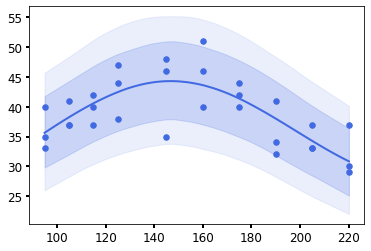

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,105.95492772687832
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,112.35444017524124
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,7.180589456110321e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.46489690e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[8.14781955e-03, 0.00000000e+00, 0.00000000e+00..."


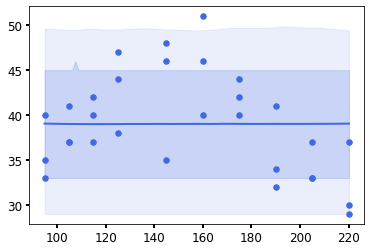

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49625542542557
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,7.180589456110321e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.51593555e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.80814860e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001977


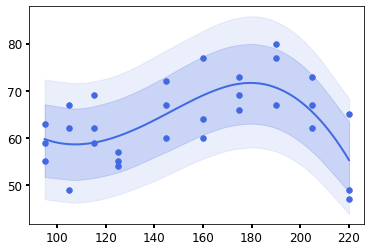

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,89.12569552251523
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,160.23868940297555
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,9.34229467196931e-09
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.32539292e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[6.56042935e-03, 0.00000000e+00, 0.00000000e+00..."


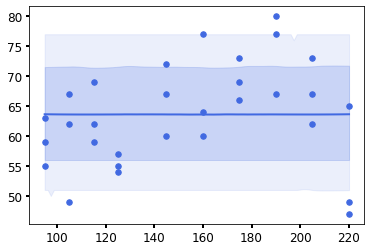

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.4934172691852
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,9.34229467196931e-09
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.98547066e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.20111565e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001995


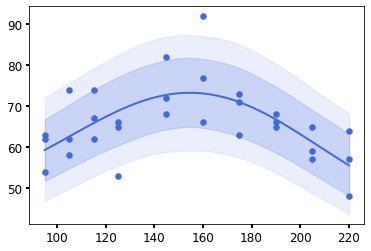

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,100.29614088060535
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,131.10050878026718
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,4.380051876655243e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.07147072e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.89631355e-03, 0.00000000e+00, 0.00000000e+00..."


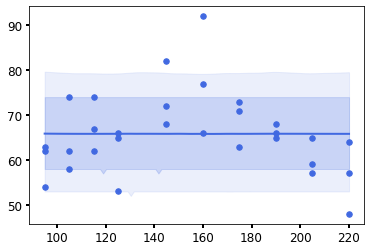

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49627741749448
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,4.380051876655243e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.01860313e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.16138711e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0003189


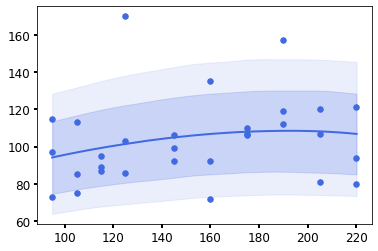

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.803745853541278
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,401.34427931323927
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.03308361725205966
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.44996280e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.24151941e-02, 0.00000000e+00, 0.00000000e+00..."


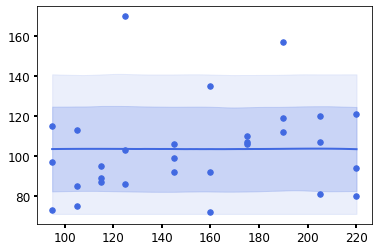

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49457088626596
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.03308361725205966
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.45239224e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.62521358e-03, 0.00000000e+00, 0.00000000e+00..."


In [10]:
indexes = log_likelihood_ratio.index.values # list of genes to be plotted 
test = 'One_sample_test' # name of the test
xtest = np.linspace(np.min(X.values)-.1,np.max(X.values)+.1,100)[:,None] # points to make prediction
likelihood = 'Negative_binomial'
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for mean,var,model in zip(params['means'][i],params['vars'][i],params['models'][i]):
        plot() 
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')

In [11]:
likelihood = 'Gaussian'
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


  7%|▋         | 1/15 [00:00<00:05,  2.34it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
0
Fit Cholesky decomposition was not successful.
{'ls': 103.03107628041401, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}


 13%|█▎        | 2/15 [00:01<00:06,  2.01it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 20%|██        | 3/15 [00:01<00:05,  2.11it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 27%|██▋       | 4/15 [00:01<00:05,  2.18it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 5/15 [00:02<00:04,  2.24it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 40%|████      | 6/15 [00:02<00:03,  2.29it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 47%|████▋     | 7/15 [00:03<00:03,  2.33it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:03<00:02,  2.34it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 60%|██████    | 9/15 [00:04<00:02,  2.35it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:04<00:02,  2.35it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 73%|███████▎  | 11/15 [00:04<00:01,  2.36it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
0
Fit Cholesky decomposition was not successful.
{'ls': 103.03107628041401, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}


 80%|████████  | 12/15 [00:05<00:01,  2.05it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 87%|████████▋ | 13/15 [00:05<00:00,  2.12it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:06<00:00,  2.19it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:06<00:00,  2.21it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0000083,22.033062,20.807010,1.226051
FBgn0000108,-5.365300,-14.290325,8.925025
FBgn0000109,23.973779,23.271379,0.702400
FBgn0000115,22.736244,17.358335,5.377909
FBgn0000221,-5.711698,-6.435773,0.724075
FBgn0000289,19.237090,18.614823,0.622267
FBgn0000318,21.103859,20.936537,0.167323
FBgn0000464,-3.242211,-9.536241,6.294030
FBgn0000618,16.425938,10.899603,5.526335
FBgn0001099,-6.858255,-9.649253,2.790997


  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 13%|█▎        | 2/15 [00:00<00:01,  9.01it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}

 27%|██▋       | 4/15 [00:00<00:01,  8.83it/s]


{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 40%|████      | 6/15 [00:00<00:01,  8.84it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:00<00:00,  8.82it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:01<00:00,  8.66it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 80%|████████  | 12/15 [00:01<00:00,  8.71it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:01<00:00,  8.55it/s]

{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:01<00:00,  8.73it/s]


{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
FBgn0000083


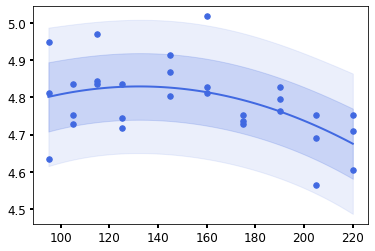

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.8655
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,437.247
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00755758


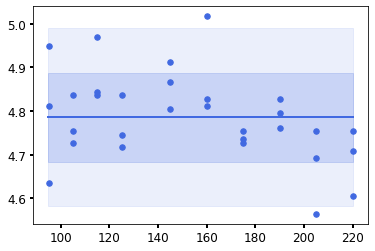

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,22.9074
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0100925


FBgn0000108


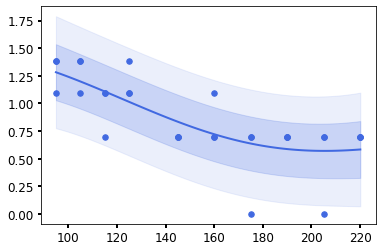

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.05498
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,100.559
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0555199


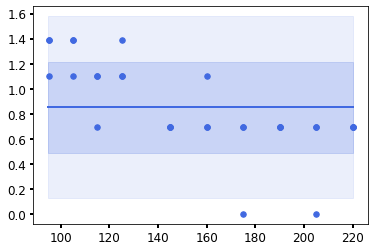

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.730308
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.127857


FBgn0000109


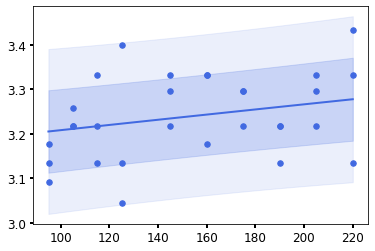

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.4147
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,4776.19
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00795113


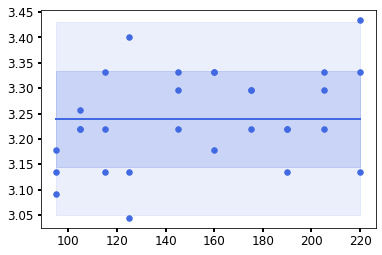

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.495
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00874733


FBgn0000115


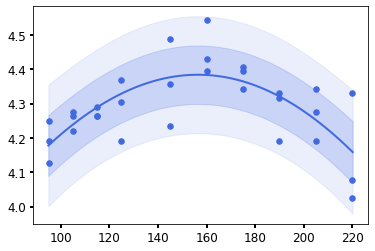

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,8.19629
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,256.998
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00671231


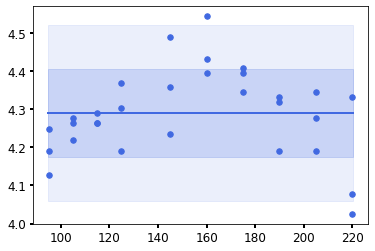

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,18.3967
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0128995


FBgn0000221


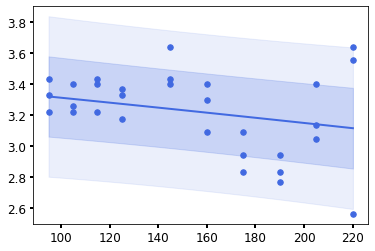

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.5827
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1741.07
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0615828


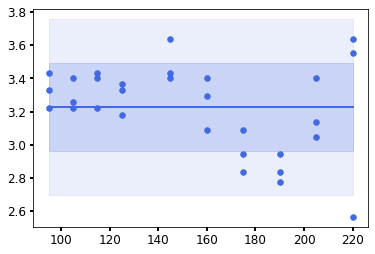

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.4121
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.067883


FBgn0000289


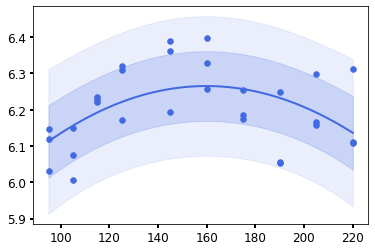

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,17.4563
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,376.367
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0086411


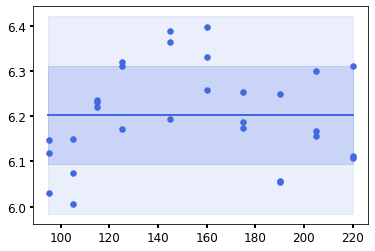

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,38.471
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0115317


FBgn0000318


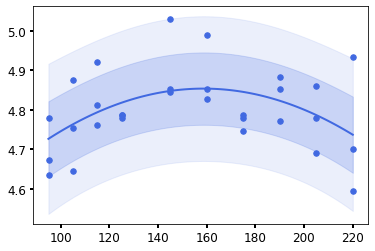

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.5381
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,356.161
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00784848


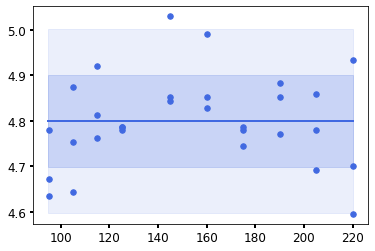

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,23.0344
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0100008


FBgn0000464


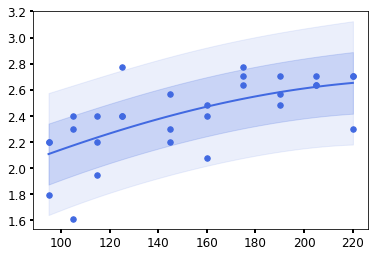

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.73676
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,290.801
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0490498


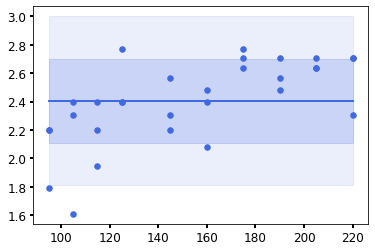

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,5.79159
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0857835


FBgn0000618


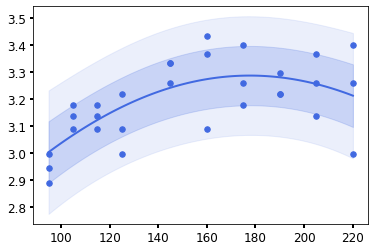

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,4.81227
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,253.96
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0112709


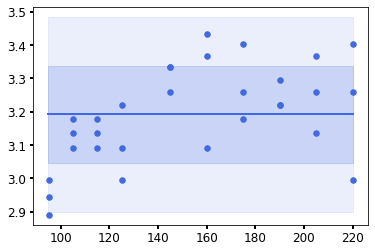

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.1855
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.020553


FBgn0001099


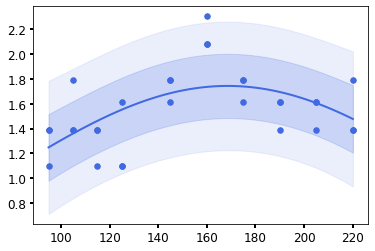

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.2467
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,112.519
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0620964


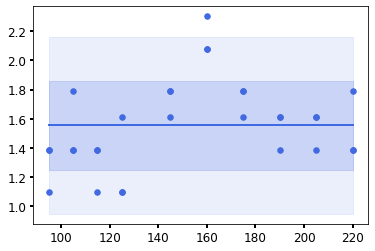

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,2.42391
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0890885


FBgn0001202


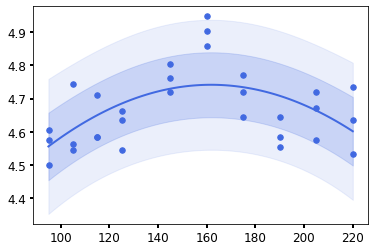

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,9.82756
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,305.658
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00897061


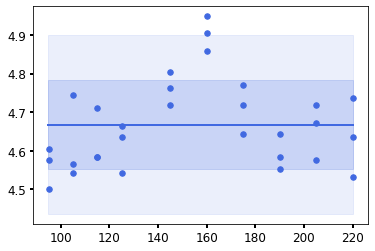

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.7891
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0129889


FBgn0001276


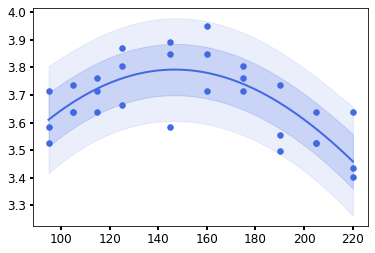

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.31158
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,193.73
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00800691


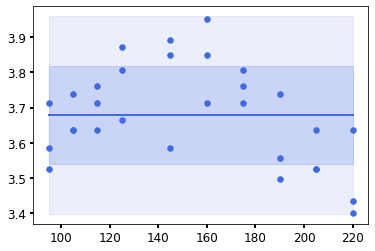

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,13.5331
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0191534


FBgn0001977


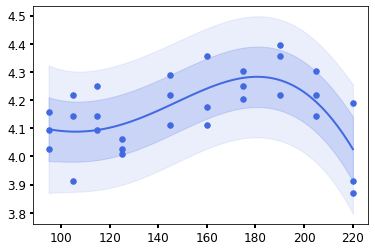

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.6838
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,115.285
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0104476


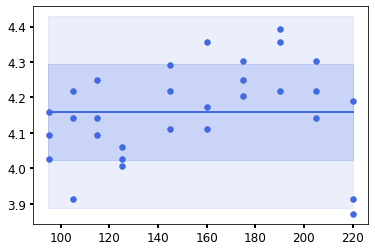

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,17.2947
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0177214


FBgn0001995


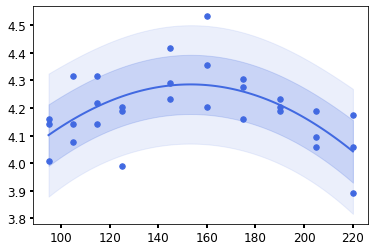

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,7.93033
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,254.952
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0106832


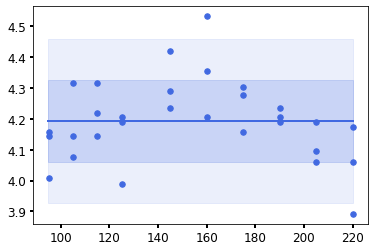

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,17.5798
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0169869


FBgn0003189


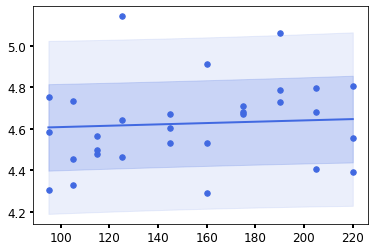

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.3431
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,7872.75
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0410809


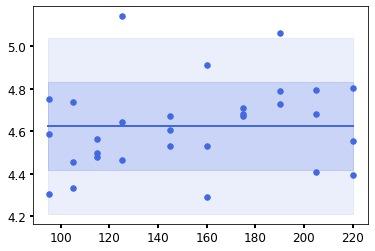

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.3993
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0416827


In [12]:
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for model,mean,var in zip(params['models'][i],params['means'][i],params['vars'][i]):
        plot()
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')

In [13]:
likelihood = 'Poisson' 
#genes_name = ['FBgn0004185','FBgn0001977']
gp_counts = Fit_GPcounts(X,Y.loc[genes_name])
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 119.43333333333334
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 119.43333333333334
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 119.43333333333334
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 119.43333333333334
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 119.43333333333334
mean_mean 0.37234

  7%|▋         | 1/15 [00:06<01:32,  6.59s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 13%|█▎        | 2/15 [00:08<01:06,  5.11s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 24.633333333333333
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 24.633333333333333
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 24.633333333333333
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 24.633333333333333
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 24.633333333333333
mean_mean 0.37234

 20%|██        | 3/15 [00:14<01:06,  5.51s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 72.36666666666666
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 72.36666666666666
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 72.36666666666666
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 72.36666666666666
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 72.36666666666666
mean_mean 0.3723462872

 27%|██▋       | 4/15 [00:20<01:02,  5.66s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 25.0
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 25.0
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 25.0
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 25.0
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 25.0
mean_mean 0.37234628722054497
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 

 33%|███▎      | 5/15 [00:26<00:58,  5.84s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 495.76666666666665
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 495.76666666666665
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 495.76666666666665
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 495.76666666666665
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 495.76666666666665
mean_mean 0.37234

 40%|████      | 6/15 [00:32<00:52,  5.82s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 121.03333333333333
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 121.03333333333333
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 121.03333333333333
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 121.03333333333333
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 121.03333333333333
mean_mean 0.37234

 47%|████▋     | 7/15 [00:40<00:50,  6.33s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 10.533333333333333
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 10.533333333333333
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 10.533333333333333
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 10.533333333333333
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 10.533333333333333
mean_mean 0.37234

 53%|█████▎    | 8/15 [00:45<00:41,  6.00s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 23.566666666666666
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 23.566666666666666
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 23.566666666666666
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 23.566666666666666
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 23.566666666666666
mean_mean 0.37234

 60%|██████    | 9/15 [00:50<00:34,  5.82s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 3.966666666666667
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 3.966666666666667
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 3.966666666666667
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 3.966666666666667
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 3.966666666666667
mean_mean 0.3723462872

 67%|██████▋   | 10/15 [00:55<00:27,  5.53s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 106.16666666666667
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 106.16666666666667
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 106.16666666666667
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 106.16666666666667
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 106.16666666666667
mean_mean 0.37234

 73%|███████▎  | 11/15 [01:00<00:21,  5.39s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 38.96666666666667
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 38.96666666666667
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 38.96666666666667
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 38.96666666666667
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 38.96666666666667
mean_mean 0.3723462872

 80%|████████  | 12/15 [01:07<00:17,  5.69s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 63.53333333333333
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 63.53333333333333
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 63.53333333333333
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 63.53333333333333
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 63.53333333333333
mean_mean 0.3723462872

 87%|████████▋ | 13/15 [01:14<00:12,  6.11s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 65.76666666666667
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 65.76666666666667
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 65.76666666666667
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 65.76666666666667
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 65.76666666666667
mean_mean 0.3723462872

 93%|█████████▎| 14/15 [01:20<00:06,  6.28s/it]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
local Optima
2
y_mean 103.26666666666667
mean_mean 0.37148681912387216
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.70046927884033, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
local Optima
2
y_mean 103.26666666666667
mean_mean 0.3732535615868953
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 96.57667465070797, 'alpha': 5.496624778787091, 'km': 43.53223926182769}
local Optima
2
y_mean 103.26666666666667
mean_mean 0.3723003311399996
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 114.38265817033253, 'alpha': 2.9090473891294435, 'km': 51.0827605197663}
local Optima
2
y_mean 103.26666666666667
mean_mean 0.3714508065641315
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 1000.0, 'var': 110.18276170348635, 'alpha': 9.726843599648843, 'km': 71.48159936743646}
local Optima
2
y_mean 103.26666666666667
mean_mean 0.37234

100%|██████████| 15/15 [01:28<00:00,  5.93s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0000083,-121.908651,-17254.769693,17132.861042
FBgn0000108,-39.570346,-74.592562,35.022216
FBgn0000109,-84.011657,-2459.831109,2375.819453
FBgn0000115,-109.282474,-9408.138171,9298.855697
FBgn0000221,-106.446116,-2526.232098,2419.785981
FBgn0000289,-185.834003,-92460.689762,92274.855759
FBgn0000318,-123.395715,-17532.742555,17409.346840
FBgn0000464,-76.050040,-834.546321,758.496281
FBgn0000618,-86.723895,-2329.463703,2242.739808
FBgn0001099,-59.746914,-236.084207,176.337292


  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


  7%|▋         | 1/15 [00:00<00:10,  1.31it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 13%|█▎        | 2/15 [00:01<00:09,  1.33it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 20%|██        | 3/15 [00:02<00:09,  1.33it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 27%|██▋       | 4/15 [00:02<00:08,  1.34it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 5/15 [00:03<00:07,  1.34it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 40%|████      | 6/15 [00:04<00:06,  1.35it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 47%|████▋     | 7/15 [00:05<00:05,  1.35it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:05<00:05,  1.32it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 60%|██████    | 9/15 [00:06<00:04,  1.32it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:07<00:03,  1.33it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 73%|███████▎  | 11/15 [00:08<00:02,  1.34it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 80%|████████  | 12/15 [00:08<00:02,  1.34it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 87%|████████▋ | 13/15 [00:09<00:01,  1.32it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:10<00:00,  1.32it/s]

{'ls': 104.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 108.5, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:11<00:00,  1.33it/s]


FBgn0000083


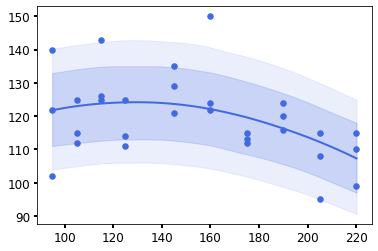

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,11.848847789581939
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,460.79230592655114
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.39457799e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-9.60483483e-03, 0.00000000e+00, 0.00000000e+00..."


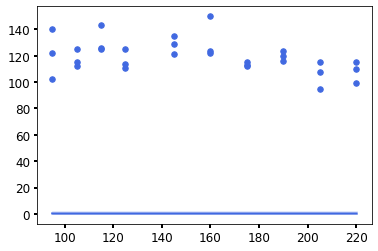

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000108


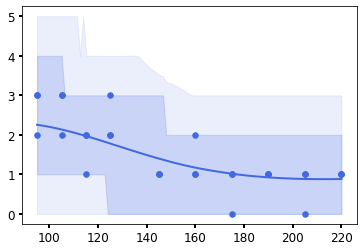

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.32166726514827626
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,53.95088723126451
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.36644862e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.95244227e-01, 0.00000000e+00, 0.00000000e+00..."


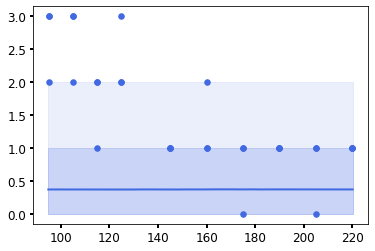

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.49541284401785
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.55626911e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.58716044e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000109


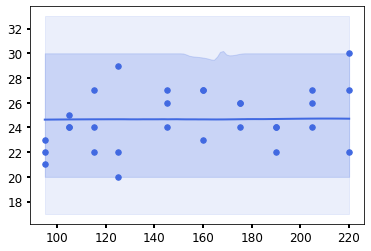

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.231633872455744
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,36492.85177977009
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00121051e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.16102119e-02, 0.00000000e+00, 0.00000000e+00..."


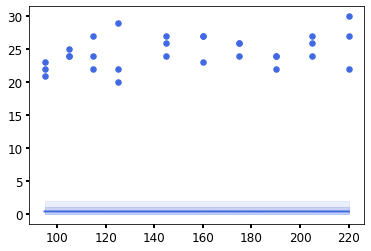

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000115


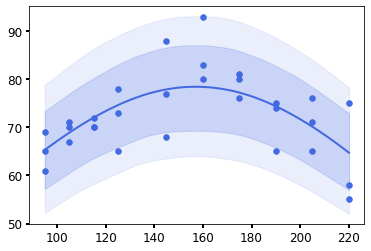

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,32.78493115000245
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,369.69273438352275
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[7.29210340e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-8.36329594e-03, 0.00000000e+00, 0.00000000e+00..."


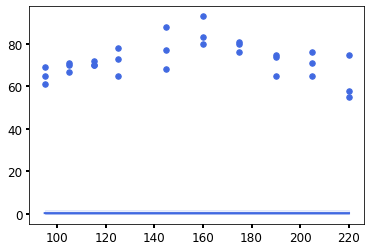

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000221


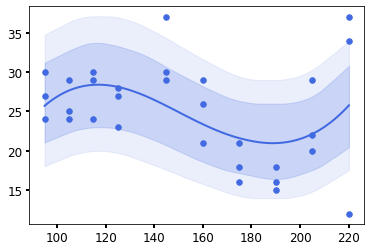

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,78.36387067800968
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,143.88741935322105
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[3.66465367e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.03389478e-02, 0.00000000e+00, 0.00000000e+00..."


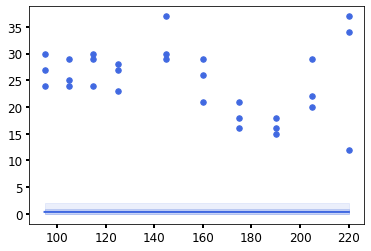

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000289


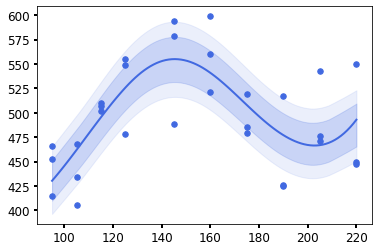

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.44371488555653
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,104.20501546850548
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[5.82627089e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.45217991e-03, 0.00000000e+00, 0.00000000e+00..."


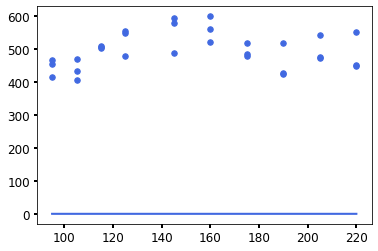

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000318


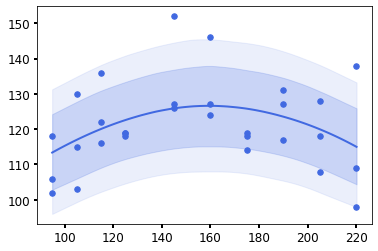

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,14.510438356510168
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,417.79973137612353
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.24144185e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-9.26214466e-03, 0.00000000e+00, 0.00000000e+00..."


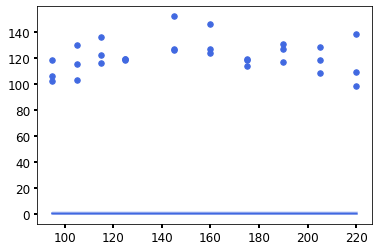

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000464


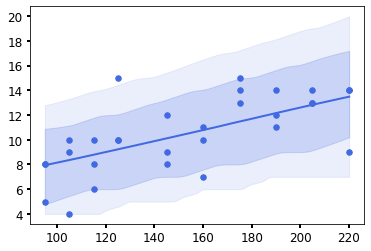

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.306052800845029
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,389.1370470966015
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.95059427e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-5.08349544e-02, 0.00000000e+00, 0.00000000e+00..."


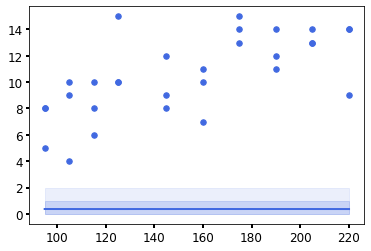

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000618


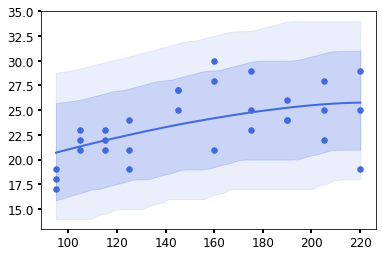

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.70002636651408
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,429.9127967048475
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.26720870e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.90680604e-02, 0.00000000e+00, 0.00000000e+00..."


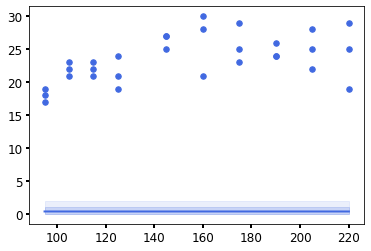

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001099


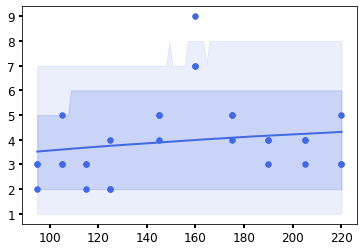

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.3537250688455993
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,337.01390476766073
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.07025960e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.26015268e-01, 0.00000000e+00, 0.00000000e+00..."


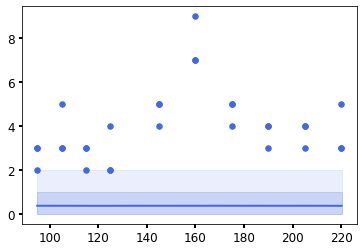

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001202


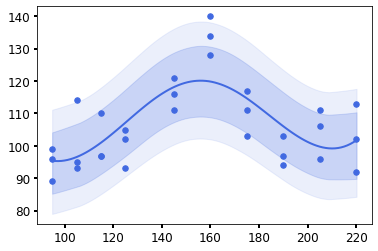

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,108.44468926344939
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,104.19248840017849
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.37333759e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.08492951e-03, 0.00000000e+00, 0.00000000e+00..."


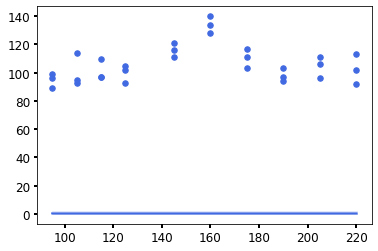

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001276


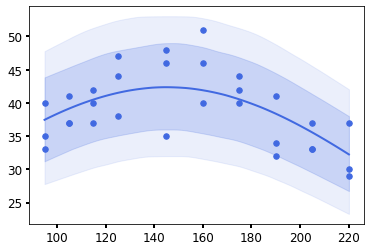

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,29.470644151713866
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,351.7471496131172
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[6.66617057e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.14358791e-02, 0.00000000e+00, 0.00000000e+00..."


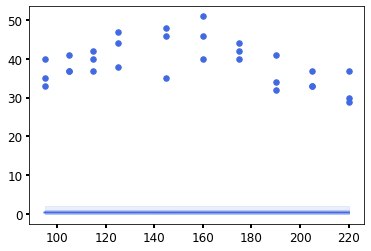

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001977


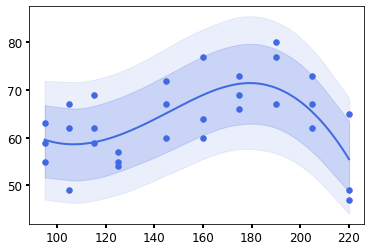

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,88.72252564364187
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,164.66880526680535
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[4.33290564e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[6.49042949e-03, 0.00000000e+00, 0.00000000e+00..."


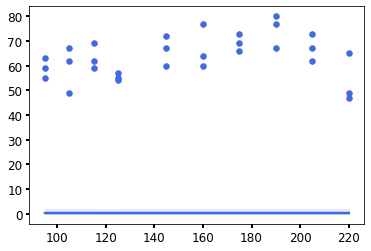

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001995


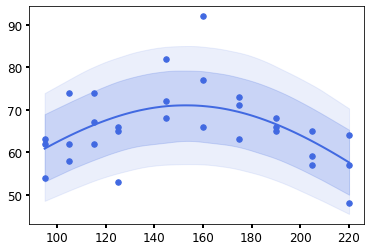

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,25.23711755207939
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,368.18311494319283
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[8.17085200e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-9.75578143e-03, 0.00000000e+00, 0.00000000e+00..."


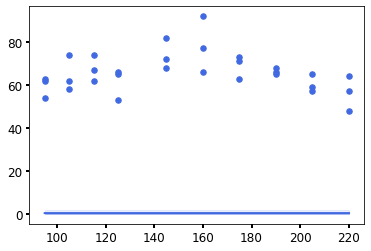

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0003189


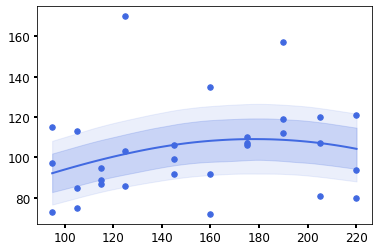

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.27397265658513
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,360.8359246105159
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.48473260e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.27139780e-02, 0.00000000e+00, 0.00000000e+00..."


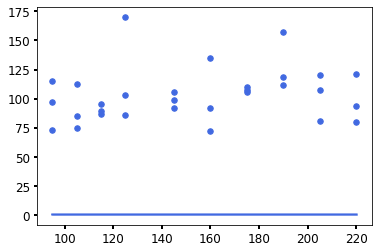

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,118.6219159586624
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.14288334e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[4.19723664e-03, 0.00000000e+00, 0.00000000e+00..."


In [14]:
indexes = log_likelihood_ratio.index.values # list of genes to be plotted 
test = 'One_sample_test' # name of the test
xtest = np.linspace(np.min(X.values)-.1,np.max(X.values)+.1,100)[:,None] # points to make prediction
likelihood = 'Poisson'
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for mean,var,model in zip(params['means'][i],params['vars'][i],params['models'][i]):
        plot() 
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')